In [5]:
import numpy as np
import pandas as pd

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [36]:
df=pd.read_csv('Final1302-2.csv',encoding='windows-1252')#had some decode error. so used encoding
df

,MyId,Id,Filename,Title,Text,Label
0,1,0,1_fake_new_dataset_3120,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,Fake
1,2,1,1_fake_new_dataset_3120,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,Real
2,3,2,1_fake_new_dataset_3120,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,Real
3,5,4,1_fake_new_dataset_3120,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,Fake
4,6,5,1_fake_new_dataset_3120,NY TIMES WORRIES HALF OF AMERICANS WILL REFUSE...,The New York Times has published an article by...,Fake
...,...,...,...,...,...,...
2591,4409,4056,2_news_4129,NaN,Vitamin C with Zinc prevent and treat the coro...,NaN
2592,4410,4059,2_news_4129,NaN,Video of a girl dying of coronavirus in a shop...,NaN
2593,4411,4062,2_news_4129,NaN,The first patient diagnosed with COVID-19 was ...,NaN
2594,4412,4063,2_news_4129,NaN,You no longer need to have contact with someon...,NaN


In [67]:
df=pd.read_csv('Final13022.csv',encoding='windows-1252')
conversion_dict={0:'False',1:'True'}
df['label']=df['label'].replace(conversion_dict)#Replace 1,0 to real and fake
df

,myId,id,filename,title,text,label_text,label
0,1,0,1_fake_new_dataset_3120,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,Fake,False
1,2,1,1_fake_new_dataset_3120,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,Real,True
2,3,2,1_fake_new_dataset_3120,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,Real,True
3,5,4,1_fake_new_dataset_3120,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,Fake,False
4,6,5,1_fake_new_dataset_3120,NY TIMES WORRIES HALF OF AMERICANS WILL REFUSE...,The New York Times has published an article by...,Fake,False
...,...,...,...,...,...,...,...
2591,4409,4056,2_news_4129,NaN,Vitamin C with Zinc prevent and treat the coro...,Fake,False
2592,4410,4059,2_news_4129,NaN,Video of a girl dying of coronavirus in a shop...,Fake,False
2593,4411,4062,2_news_4129,NaN,The first patient diagnosed with COVID-19 was ...,Fake,False
2594,4412,4063,2_news_4129,NaN,You no longer need to have contact with someon...,Fake,False


In [68]:
#Check the balance of the data
df.label.value_counts()#Not balanced. Have to find a way to solve this

True     1310
False    1286
Name: label, dtype: int64

In [69]:
import string
import re
def word_drop(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W","",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w"\d\w"','',text)
    return text

In [70]:
df["text"]=df["text"].apply(word_drop)

In [71]:
df.head(5)

,myId,id,filename,title,text,label_text,label
0,1,0,1_fake_new_dataset_3120,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,facebookhasshutteredapopulargroupformichigande...,Fake,False
1,2,1,1_fake_new_dataset_3120,Other Viewpoints: COVID-19 is worse than the flu,wecannowofficiallyputtorestallcomparisonsofcov...,Real,True
2,3,2,1_fake_new_dataset_3120,Bermuda's COVID-19 cases surpass 100,theministryofhealthinbermudahasconfirmedanewsp...,Real,True
3,5,4,1_fake_new_dataset_3120,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,lockingdownmuchofthecountrymayhavehelpedtoflat...,Fake,False
4,6,5,1_fake_new_dataset_3120,NY TIMES WORRIES HALF OF AMERICANS WILL REFUSE...,thenewyorktimeshaspublishedanarticlebypopulara...,Fake,False


In [72]:
X_train, X_test,y_train, y_test=train_test_split(df['text'],df['label'],test_size=0.25,random_state=9,shuffle=True)

In [73]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.75)

In [74]:
vec_train=tfidf_vectorizer.fit_transform(X_train.values.astype('U'))
vec_test=tfidf_vectorizer.transform(X_test.values.astype('U'))

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(vec_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [76]:
y_pred=knn.predict(vec_test)
score=accuracy_score(y_test,y_pred)
print(f'PAC Accuracy: {round(score*100,2)}%')

PAC Accuracy: 51.62%


In [77]:
#Or
knn.score(vec_test,y_test)

0.5161787365177196

In [19]:
#Can use gridSearchCV or Kfold crossvalidation to change the k value and get the optimal value

In [78]:
cm=confusion_matrix(y_test,y_pred, labels=['True','False'])
cm

array([[332,   0],
       [314,   3]], dtype=int64)

Text(33.22222222222222, 0.5, 'Actual')

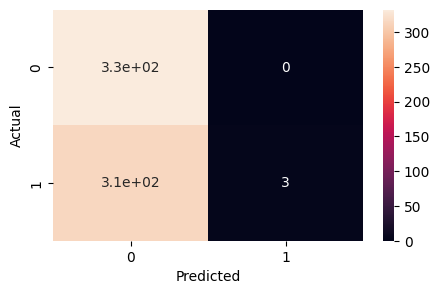

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       1.00      0.01      0.02       317
        True       0.51      1.00      0.68       332

    accuracy                           0.52       649
   macro avg       0.76      0.50      0.35       649
weighted avg       0.75      0.52      0.36       649



In [23]:
df_true=pd.read_csv('Real.csv',encoding='windows-1252')
df_fake=pd.read_csv('Fake.csv',encoding='windows-1252')
df_final=pd.concat([df_true,df_fake])

FileNotFoundError: [Errno 2] No such file or directory: 'Real.csv'

In [ ]:
def find_label(newtext):
    vec_newtext=tfidf_vectorizer.transform([newtext])
    y_pred=knn.predict(vec_newtext)
    return y_pred[0]

In [ ]:
find_label((df_true['text'][0]))#predicting true news as false

In [ ]:
find_label((df_fake['text'][0]))

In [ ]:
sum([1 if find_label((df_true['text'][i]))=='True' else 0 for i in range(len(df_true['text']))])/df_true['text'].size

In [ ]:
sum([1 if find_label((df_fake['text'][i]))=='false' else 0 for i in range(len(df_fake['text']))])/df_fake['text'].size

In [ ]:
#Only 24% times the model predicts the actual results as true for the unknown dataset which all the news are true
#Only 21% times the model predicts the actual results as true for the unknown dataset which all the news are false

In [ ]:
pd. __version__

In [82]:
import nltk
nltk.download('stopwords')
text = "This is a sentence with stop words."

# Remove stop words
stop_words = nltk.corpus.stopwords.words('english')
clean_text = [word for word in text.split() if word not in stop_words]

print(' '.join(clean_text))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thiya\AppData\Roaming\nltk_data...


This sentence stop words.


[nltk_data]   Unzipping corpora\stopwords.zip.
